In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pylab as plt
import math
import seaborn as sbn
%matplotlib inline

In [2]:
import os
cwd = os.getcwd()
#os.chdir(/Users/johnhughes/Desktop/CUSP/ADS)
print(cwd)

/Users/johnhughes/Desktop/CUSP/ADS/Final


In [3]:
DecListings = pd.read_csv("DecListings.csv")

for col in DecListings: 
    print (col)

DecListings.shape



//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (61,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
cal

(49056, 96)

In [4]:
DecListingsNew = DecListings[['id','last_scraped','name','summary','space','description','host_id','host_is_superhost','host_total_listings_count','city','state','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','amenities','square_feet','price','cleaning_fee','guests_included','review_scores_rating']].copy()

DecListingsNew.dropna()

DecListingsNew.shape

(49056, 25)

In [5]:
DecListingsNew.isna().sum()

id                               0
last_scraped                     0
name                            17
summary                       1916
space                        14702
description                    534
host_id                          0
host_is_superhost                7
host_total_listings_count        7
city                            53
state                           13
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                       76
bedrooms                        49
beds                            44
amenities                        0
square_feet                  48590
price                            0
cleaning_fee                 11078
guests_included                  0
review_scores_rating         11310
dtype: int64

In [6]:
NovListings = pd.read_csv("NovListings.csv")

#for col in NovListings: 
    #print (col)

NovListings.shape

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(50968, 96)

In [7]:
NovListingsNew = NovListings[['id','last_scraped','name','summary','space','description','host_id','host_is_superhost','host_total_listings_count','city','state','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','amenities','square_feet','price','cleaning_fee','guests_included','review_scores_rating']].copy()

NovListingsNew.dropna()

NovListingsNew.shape

(50968, 25)

In [8]:
DecListingsNew.isna().sum()

id                               0
last_scraped                     0
name                            17
summary                       1916
space                        14702
description                    534
host_id                          0
host_is_superhost                7
host_total_listings_count        7
city                            53
state                           13
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                       76
bedrooms                        49
beds                            44
amenities                        0
square_feet                  48590
price                            0
cleaning_fee                 11078
guests_included                  0
review_scores_rating         11310
dtype: int64

In [10]:
import glob      
 

for file in list(glob.glob('*.csv')):  
    print(file)
    data = pd.read_csv(file)
    #data.shape
    
    #get required columns
    dataNew = data[['id','last_scraped','name','summary','description','host_id','host_is_superhost','host_total_listings_count','neighbourhood_group_cleansed','state','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','amenities','price','cleaning_fee','guests_included','review_scores_rating']].copy()
    
    #filter for Manhattan DF
    data_Manhattan = dataNew.loc[(dataNew['neighbourhood_group_cleansed'] == 'Manhattan')]
    #data_Manhattan.shape
    
    #view if there are nulls in Manhattan
    print(data_Manhattan.isnull().sum())
    
    #print Manhattan DF to csv
    data_Manhattan.to_csv(file + '_Manhattan.csv')
    
    #filter for Brooklyn DF
    data_Brooklyn = dataNew.loc[(dataNew['neighbourhood_group_cleansed'] == 'Brooklyn')]
    #data_Brooklyn.shape
    
    #view if there are nulls in Brooklyn
    print(data_Brooklyn.isnull().sum())
    
    #print Brooklyn DF to csv
    data_Brooklyn.to_csv(file + '_Brooklyn.csv')

AugListings.csv
id                                 0
last_scraped                       0
name                              13
summary                          906
description                      182
host_id                            0
host_is_superhost                  1
host_total_listings_count          1
neighbourhood_group_cleansed       0
state                              7
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         45
bedrooms                          22
beds                              22
amenities                          0
price                              0
cleaning_fee                    5749
guests_included                    0
review_scores_rating            6147
dtype: int64
id                                 0
last_scraped                       0
name                               8
summary  

In [2]:
dataB = pd.read_csv("Brooklyn2018.csv")

In [4]:
dataB.shape

(243087, 25)

In [5]:
print(243087 *0.8)
print(243087*.1)

194469.6
24308.7


In [5]:
dataB.price = dataB.price.str.replace('$', '')
dataB.price = dataB.price.str.replace(',', '')

In [6]:
dataB.cleaning_fee = dataB.cleaning_fee.str.replace('$', '')
dataB.cleaning_fee = dataB.cleaning_fee.str.replace(',', '')

In [7]:
dataB.head()

,Unnamed: 0,Unnamed: 0.1,id,last_scraped,name,summary,description,host_id,host_is_superhost,host_total_listings_count,...,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,cleaning_fee,guests_included,review_scores_rating
0,0,3,23170448,2018-04-07,close to the beach!!!,"Located in a quiet area, just a few blocks fro...","Located in a quiet area, just a few blocks fro...",161509340,f,6.0,...,Private room,5,1.0,3.0,3.0,"{Wifi,""Air conditioning"",Kitchen,""Free parking...",100.00,50.00,1,100.0
1,1,4,6179073,2018-04-07,Mini Studio in NY city safest area,Walk-in studio in a private house located in a...,Walk-in studio in a private house located in a...,32052000,t,2.0,...,Private room,2,1.0,1.0,1.0,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",45.00,25.00,1,97.0
2,2,8,19330743,2018-04-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,f,1.0,...,Entire home/apt,4,1.0,1.0,1.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",90.00,50.00,1,85.0
3,3,9,17500994,2018-04-07,Brooklyn Cave in the Neighb,"My place is close to restaurants, dining and p...","My place is close to restaurants, dining and p...",87889145,f,1.0,...,Entire home/apt,2,1.0,0.0,1.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",55.00,30.00,2,100.0
4,4,11,17622093,2018-04-07,Private room in south bk,Close to Q and B train and the beach. Tons of ...,Close to Q and B train and the beach. Tons of ...,2070825,f,1.0,...,Private room,2,1.5,1.0,2.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets allo...",90.00,NaN,1,NaN


In [8]:
dataB.dtypes

Unnamed: 0                        int64
Unnamed: 0.1                      int64
id                                int64
last_scraped                     object
name                             object
summary                          object
description                      object
host_id                           int64
host_is_superhost                object
host_total_listings_count       float64
neighbourhood_group_cleansed     object
state                            object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
amenities                        object
price                            object
cleaning_fee                     object
guests_included                   int64
review_scores_rating            float64


In [9]:
dataB['price'] = dataB.price.astype(float)

In [10]:
dataB['cleaning_fee'] = dataB.cleaning_fee.astype(float)

In [11]:
#b = {'f': 0, 't':1}
#dataB.replace({'host_is_superhost':{'f': 0, 't':1}})
#dataB.head()
dataB.host_is_superhost = dataB.host_is_superhost.str.replace('f', '0')   
dataB.host_is_superhost = dataB.host_is_superhost.str.replace('t', '1')
dataB.head()

,Unnamed: 0,Unnamed: 0.1,id,last_scraped,name,summary,description,host_id,host_is_superhost,host_total_listings_count,...,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,cleaning_fee,guests_included,review_scores_rating
0,0,3,23170448,2018-04-07,close to the beach!!!,"Located in a quiet area, just a few blocks fro...","Located in a quiet area, just a few blocks fro...",161509340,0,6.0,...,Private room,5,1.0,3.0,3.0,"{Wifi,""Air conditioning"",Kitchen,""Free parking...",100.0,50.0,1,100.0
1,1,4,6179073,2018-04-07,Mini Studio in NY city safest area,Walk-in studio in a private house located in a...,Walk-in studio in a private house located in a...,32052000,1,2.0,...,Private room,2,1.0,1.0,1.0,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",45.0,25.0,1,97.0
2,2,8,19330743,2018-04-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,0,1.0,...,Entire home/apt,4,1.0,1.0,1.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",90.0,50.0,1,85.0
3,3,9,17500994,2018-04-07,Brooklyn Cave in the Neighb,"My place is close to restaurants, dining and p...","My place is close to restaurants, dining and p...",87889145,0,1.0,...,Entire home/apt,2,1.0,0.0,1.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",55.0,30.0,2,100.0
4,4,11,17622093,2018-04-07,Private room in south bk,Close to Q and B train and the beach. Tons of ...,Close to Q and B train and the beach. Tons of ...,2070825,0,1.0,...,Private room,2,1.5,1.0,2.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets allo...",90.0,NaN,1,NaN


In [12]:
dataB['host_is_superhost'] = dataB.host_is_superhost.astype(float)

In [1]:
dataB.room_type.unique()

NameError: name 'dataB' is not defined

In [ ]:

dataBTrain=data.iloc[:,:]
dataBTest=data.iloc[:,:]
dataBValid=data.iloc[:,:]

In [3]:
#import packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pylab as plt
import math
import seaborn as sbn
%matplotlib inline

dataB = pd.read_csv("Brooklyn2018.csv") #read in Brooklyn data

#remove unnecessary characters, get strings to floats
dataB.price = dataB.price.str.replace('$', '')
dataB.price = dataB.price.str.replace(',', '')

dataB.cleaning_fee = dataB.cleaning_fee.str.replace('$', '')
dataB.cleaning_fee = dataB.cleaning_fee.str.replace(',', '')

dataB['price'] = dataB.price.astype(float)
dataB['cleaning_fee'] = dataB.cleaning_fee.astype(float)

#convert superhost to binary int
dataB.host_is_superhost = dataB.host_is_superhost.str.replace('f', '0')   
dataB.host_is_superhost = dataB.host_is_superhost.str.replace('t', '1')
dataB['host_is_superhost'] = dataB.host_is_superhost.astype(float)

In [4]:
#filter out private rooms
dataB1 = dataB.loc[(dataB.room_type == 'Entire home/apt')]

In [5]:
dataB1 = dataB1[['id', 'last_scraped', 'name', 'summary', 'description', 'host_id', 'neighbourhood_group_cleansed', 
               'state', 'latitude', 'longitude', 'property_type', 'room_type', 'amenities', 'cleaning_fee', 'price',
               'host_is_superhost', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
               'guests_included', 'review_scores_rating']]

In [12]:
from sklearn import preprocessing

In [6]:
dataB2 = dataB1.dropna()
dataB2.head()

,id,last_scraped,name,summary,description,host_id,neighbourhood_group_cleansed,state,latitude,longitude,...,cleaning_fee,price,host_is_superhost,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,review_scores_rating
2,19330743,2018-04-07,Jazz guesthouse,"This is my guesthouse, A 10 minute drive from ...","This is my guesthouse, A 10 minute drive from ...",125231390,Brooklyn,NY,40.640762,-73.882979,...,50.0,90.0,0.0,1.0,4,1.0,1.0,1.0,1,85.0
3,17500994,2018-04-07,Brooklyn Cave in the Neighb,"My place is close to restaurants, dining and p...","My place is close to restaurants, dining and p...",87889145,Brooklyn,NY,40.644579,-73.902851,...,30.0,55.0,0.0,1.0,2,1.0,0.0,1.0,2,100.0
5,9999919,2018-04-07,CITY'S BEST THREE (3) BEDROOMS,"""City's Best"" is a home with an apartment that...","""City's Best"" is a home with an apartment that...",15728213,Brooklyn,NY,40.632628,-73.896001,...,75.0,250.0,0.0,1.0,8,1.5,3.0,4.0,4,97.0
10,21977042,2018-04-07,Brighton Beach Hideaway 5 min walk from the Beach,This is a 2 Bedroom apartment with private kit...,This is a 2 Bedroom apartment with private kit...,160457828,Brooklyn,NY,40.578722,-73.960085,...,40.0,129.0,1.0,1.0,5,1.0,2.0,3.0,4,100.0
12,13170159,2018-04-08,Brooklyn Brand New Studio,"NEW STUDIO WITH PANORAMIC WINDOW, HARD WOOD FL...","NEW STUDIO WITH PANORAMIC WINDOW, HARD WOOD FL...",62535444,Brooklyn,NY,40.578667,-73.952268,...,0.0,99.0,0.0,2.0,3,1.0,0.0,1.0,4,85.0


In [7]:
#split the data
np.random.seed(2018)
splitind=np.random.uniform(size=len(dataB2))
dataBTrain=dataB2.loc[splitind<=0.8]
dataBTest=dataB2.loc[(splitind>0.8)&(splitind<0.9)]
dataBValid=dataB2.loc[(splitind>=0.9)]

In [8]:
mu=dataBTrain.iloc[:,15:].mean()
sigma=dataBTrain.iloc[:,15:].std() 

In [9]:
dataBTrain.iloc[:,15:]=(dataBTrain.iloc[:,15:]-mu)/sigma
dataBTest.iloc[:,15:]=(dataBTest.iloc[:,15:]-mu)/sigma
dataBValid.iloc[:,15:]=(dataBValid.iloc[:,15:]-mu)/sigma


//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
dataBTrain.head()

,id,last_scraped,name,summary,description,host_id,neighbourhood_group_cleansed,state,latitude,longitude,...,cleaning_fee,price,host_is_superhost,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,review_scores_rating
3,17500994,2018-04-07,Brooklyn Cave in the Neighb,"My place is close to restaurants, dining and p...","My place is close to restaurants, dining and p...",87889145,Brooklyn,NY,40.644579,-73.902851,...,30.0,55.0,-0.554109,-0.363460,-0.919018,-0.361149,-1.497748,-0.757135,-0.100475,0.797679
10,21977042,2018-04-07,Brighton Beach Hideaway 5 min walk from the Beach,This is a 2 Bedroom apartment with private kit...,This is a 2 Bedroom apartment with private kit...,160457828,Brooklyn,NY,40.578722,-73.960085,...,40.0,129.0,1.804669,-0.363460,0.450638,-0.361149,0.503879,0.591385,1.177141,0.797679
12,13170159,2018-04-08,Brooklyn Brand New Studio,"NEW STUDIO WITH PANORAMIC WINDOW, HARD WOOD FL...","NEW STUDIO WITH PANORAMIC WINDOW, HARD WOOD FL...",62535444,Brooklyn,NY,40.578667,-73.952268,...,0.0,99.0,-0.554109,0.308829,-0.462466,-0.361149,-1.497748,-0.757135,1.177141,-1.589645
13,867220,2018-04-07,Victorian Home 1 & Express Train,Welcome to our home in beautiful Victorian Fla...,Welcome to our home in beautiful Victorian Fla...,391612,Brooklyn,NY,40.650071,-73.966238,...,200.0,740.0,-0.554109,-0.363460,5.472708,5.734892,3.506320,1.939905,1.815949,-0.953025
24,13686462,2018-04-07,"Big, beautiful 2 bedroom apartment in Bushwick!",My place is close to My place is close to the ...,My place is close to My place is close to the ...,13351364,Brooklyn,NY,40.684382,-73.948236,...,30.0,180.0,-0.554109,-0.363460,-0.005914,-0.361149,0.503879,-0.082875,-0.100475,0.797679


In [11]:
from sklearn.decomposition import PCA

In [ ]:
scalerX = preprocessing.StandardScaler().fit(X1)
X1S=scalerX.transform(X1) 
X2S=scalerX.transform(X2) 
X3S=scalerX.transform(X3) 

In [9]:
lm = smf.ols('price ~ host_is_superhost + host_total_listings_count + accommodates + bathrooms + bedrooms + beds + guests_included + review_scores_rating + cleaning_fee', data = dataBTrain).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1607.
Date:                Mon, 25 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:58:02   Log-Likelihood:            -3.9886e+05
No. Observations:               61678   AIC:                         7.977e+05
Df Residuals:                   61668   BIC:                         7.978e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   120.7559      1.385     87.166      0.000     118.041     123.471
host_is_superhost            -0.4919      0.649     -0.758      0.448      -1.763       0.780
host_total_listings_count     0.2838      0.643      0.441      0.659      -0.977       1.545
accommodates                 35.2408      1.191     29.601      0.000      32.907      37.574
bathrooms                    40.4435      0.813     49.742      0.000      38.850      42.037
bedrooms                      5.4327      1.052      5.164      0.000       3.371       7.495
beds                        -14.9969      1.152    -13.023      0.000     -17.254     -12.740
guests_included              -6.3497      0.786     -8.075      0.000      -7.891      -4.808
review_scores_rating          6.8051      0.647     10.523      0.000       5.538       8.073
cleaning_fee                  0.6225      0.016     39.147      0.000       0.591       0.654
==============================================================================
Omnibus:                   180205.754   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      15082714660.005
Skew:                          40.880   Prob(JB):                         0.00
Kurtosis:                    2424.212   Cond. No.                         213.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(data_Brooklyn.isnull().sum())

In [10]:
from sklearn.metrics import r2_score
Ridge=linear_model.Ridge(fit_intercept=True, alpha=10)
Ridge.fit(dataBTrain.iloc[:,15:],dataBTrain.price)
# In sample:
PricePredRidge_IS=Ridge.predict(dataBTrain.iloc[:,15:])
print("The IS R-squared of Ridge is: {}".format(r2_score(dataBTrain.price,PricePredRidge_IS)))
Ridge.coef_
PricePredRidge_OS=Ridge.predict(dataBTest.iloc[:,15:])
print("The OS R-squared of Ridge is: {0}".format(r2_score(dataBTest.price,PricePredRidge_OS)))

The IS R-squared of Ridge is: 0.1698603425035471
The OS R-squared of Ridge is: 0.11212348562749075


In [11]:
#try Lasso with an another arbitrary regularization parameter alpha=0.01 (if we try alpha=1 this turns out to be too much regularization already)
Lasso=linear_model.Lasso(fit_intercept=True, alpha=10)

Lasso.fit(dataBTrain.iloc[:,15:],dataBTrain.price)
# In sample:
PricePredLasso_IS=Lasso.predict(dataBTrain.iloc[:,15:])
print("The IS R-squared of Lasso is: {0}".format(r2_score(dataBTrain.price,PricePredLasso_IS)))
#Out of sample
PricePredLasso_OS=Lasso.predict(dataBTest.iloc[:,15:])
print("The OS R-squared of Lasso is: {0}".format(r2_score(dataBTest.price,PricePredLasso_OS)))
Lasso.coef_

The IS R-squared of Lasso is: 0.15982982150128922
The OS R-squared of Lasso is: 0.10485572546270683


array([ 0.        ,  0.        , 25.04837041, 40.03665999,  2.03192683,
        0.        ,  0.        ,  0.        ])

In [12]:
#Find the Alpha and report best test performance for Ridge/Lasso.
def Regularization_fit_alpha(model,X_train,y_train,X_valid,y_valid,alphas,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #aplhas: a list of aplha values to try
    #Graph: plot the graph of R^2 values for different alpha

    R_2_OS=[] #out of sample R2's
    
    #initialize the model to use for each given alpha
    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_alpha = alphas[0]
    best_coefs = []
    
    for a in alphas: #for all alphas to try
        lm = RM(a) #assign the model
        lm.fit(X_train,y_train)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        R_2_OS_=r2_score(y_valid,y_predict)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2: #if current OS R2 is the best - update the best solution
            best_R2 = R_2_OS_
            best_alpha = a
            best_coefs = lm.coef_
    
    if Graph==True: #visualization of the performance depending on alpha
        plt.title('OS-R-squared for different Alpha')
        if logl: #log-scale
            plt.xlabel('ln(Alpha)')
            l=np.log(alphas)
            bl=np.log(best_alpha)
        else:
            plt.xlabel('Alpha')
            l=alphas
            bl=best_alpha
        plt.ylim((-0.1,1))
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return [best_alpha,best_R2,best_coefs]

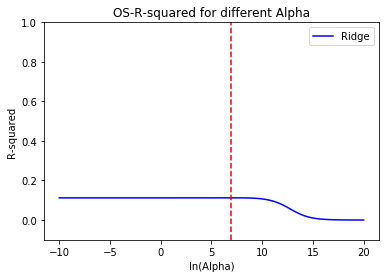

Optimal alpha for Ridge=1063.900307652953, best OS R_2=0.11220248806816802


In [14]:
alphas = np.exp(np.linspace(-10,20,100)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(1,dataBTrain.iloc[:,15:],dataBTrain.price,dataBTest.iloc[:,15:],dataBTest.price,alphas,Graph=True,logl=True)
print('Optimal alpha for Ridge={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))

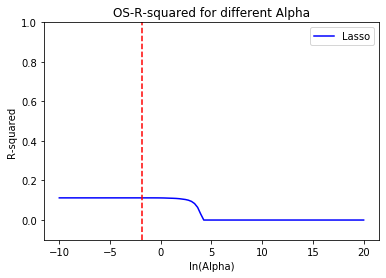

Optimal alpha for Lasso=0.16232061118184815, best OS R_2=0.11213277069806249


In [15]:
alphas = np.exp(np.linspace(-10,20,100)) #exponential range of possible alphas
[alpha_optimal, best_R2, best_coefs]=Regularization_fit_alpha(2,dataBTrain.iloc[:,15:],dataBTrain.price,dataBTest.iloc[:,15:],dataBTest.price,alphas,Graph=True,logl=True)
print('Optimal alpha for Lasso={0}, best OS R_2={1}'.format(alpha_optimal,best_R2))

In [14]:
#import packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pylab as plt
import math
import seaborn as sbn
%matplotlib inline

brook = pd.read_csv("Brooklyn2018_EntireHomeApt.csv") #read in Brooklyn data

#remove unnecessary characters, get strings to floats
brook.price = brook.price.str.replace('$', '')
brook.price = brook.price.str.replace(',', '')

brook.cleaning_fee = brook.cleaning_fee.str.replace('$', '')
brook.cleaning_fee = brook.cleaning_fee.str.replace(',', '')

brook['price'] = brook.price.astype(float)
brook['cleaning_fee'] = brook.cleaning_fee.astype(float)

#convert superhost to binary int
brook.host_is_superhost = brook.host_is_superhost.str.replace('f', '0')   
brook.host_is_superhost = brook.host_is_superhost.str.replace('t', '1')
brook['host_is_superhost'] = brook.host_is_superhost.astype(float)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [ ]:
dataM.price = dataM.price.str.replace('$', '')
dataM.price = dataM.price.str.replace(',', '')
dataM['price'] = dataM.price.astype(float)